In [1]:
#4주차 기술통계

In [2]:
values = [1,2,2,2,3,3,4,4,5,5,5,1,1] #리스트 생성

In [3]:
hist ={} #데이터를 담을 빈 공간 생성
for x in values :
    hist[x] = hist.get(x,0) +1 #x에 값이 있으면 hist에서 해당되는 인덱스의 값이 나옴
    
hist

{1: 3, 2: 3, 3: 2, 4: 2, 5: 3}

In [5]:
#콜렉션즈로도 가능하다.
#collections -> counter
from collections import Counter
count_value = Counter(values) #vlaue안의 값의 개수를 자동으로 세어준다. 그 값을 카운터_벨류에 넣음
count_value 
#위의 값과 동일하게 나온다

Counter({1: 3, 2: 3, 3: 2, 4: 2, 5: 3})

In [7]:
#itertools 로도 가능
# groupvy : 그룹해주는 명령어
# 1. 정렬된 상태로 출력된다 ( aaa bbb ccc) > 같은 데이터를 연속적으로 묶어줌, 다른 데이터가 나올 때 까지
# 2. 값이 아니라 iterator가 반환된다.

from itertools import groupby
{key:len(list(group)) for key, group in groupby(sorted(values))}
#key와 group이 groupby sorted value에 있는 키와 그룹 값이다

{1: 3, 2: 3, 3: 2, 4: 2, 5: 3}

In [9]:
for key, group in groupby(sorted(values)):
    print(key, list(group))
    
#값이 몇개있는지 출력하여 나타내준다. (int의 경우)

1 [1, 1, 1]
2 [2, 2, 2]
3 [3, 3]
4 [4, 4]
5 [5, 5, 5]


In [10]:
values2 =["a", "a", "a", "a", "b", "b","b",]
for key, group in groupby(sorted(values2)):
    print(key, list(group)) #그룹을 list로 만들었으므로 리스트(대괄호) 형태로 값이 출력된다.
    
    
#연속된만큼 묶여서 나옴
#key는 인덱스 값 (앞부분), value는 대괄호 안의 값

a ['a', 'a', 'a', 'a']
b ['b', 'b', 'b']


In [15]:
import numpy as np #넘파이 사용하기
hist = {key : val for key, val in enumerate(np.bincount(values))}
print(hist)

{0: 0, 1: 3, 2: 3, 3: 2, 4: 2, 5: 3}


In [14]:
np.bincount(values) #bincount : 몇개씩 들어가있는지 세준다.
#출력되는 순서대로 0 1 2 3 ... 순서 위치의 숫자 개수 표시
#값이 없는 부분은 (0 같은 경우) 0으로 출력된다

array([0, 3, 3, 2, 2, 3], dtype=int64)

In [16]:
for a in enumerate(np.bincount(values)):
    print(a)
    
    #값을 세어서 숫자를 붙여준다.

(0, 0)
(1, 3)
(2, 3)
(3, 2)
(4, 2)
(5, 3)


In [17]:
hist

{0: 0, 1: 3, 2: 3, 3: 2, 4: 2, 5: 3}

In [22]:
#속도테스트
import random #랜덤 넘버 제너레이터
import time #시간 모듈

long_values = [random.uniform(1,10) for _ in range(1000000)] #백만개의 요소를 가진 리스트생성
start = time.time()
hist ={} #데이터를 담을 빈 공간 생성
for x in long_values :
    hist[x] = hist.get(x,0) +1
print("for loop :", time.time() - start ) #초단위로 출력됨

start = time.time()
count_value = Counter(long_values) #vlaue안의 값의 개수를 자동으로 세어준다. 그 값을 카운터_벨류에 넣음
print("collection counter :", time.time() - start )

start = time.time()
{key:len(list(group)) for key, group in groupby(sorted(long_values))}
print("itertools.groupby :", time.time() - start )

sorted_long_values = sorted(long_values)
start = time.time()
{key:len(list(group)) for key, group in groupby(sorted(sorted_long_values))}
print("itertools.groupby sorted values :", time.time() - start )

start = time.time()
hist = {key : val for key, val in enumerate(np.bincount(long_values))}
print("numpy bincount", time.time() - start )


for loop : 0.6885933876037598
collection counter : 0.4611198902130127
itertools.groupby : 1.817866563796997
itertools.groupby sorted values : 1.2412652969360352
numpy bincount 0.10080265998840332


In [25]:
# bincount가 젤 빠르다!
#numpy는 내부가 c로 짜여져 있기때문에 빠른편
# pypy는 퓨어 파이썬일때 빠르다 c는 pypy에서 느림


In [24]:
hist[9]

111121

In [26]:
hist

{0: 0,
 1: 111009,
 2: 111341,
 3: 110654,
 4: 111376,
 5: 111080,
 6: 111155,
 7: 111148,
 8: 111116,
 9: 111121}

In [28]:
# dict iteration keys, values, items #key값만 나옴 / value만 나옴 / 둘 다 나옴 의 차이

In [34]:
for key in sorted(hist.keys()):
    print(key, hist[key]) #key값이 정렬된 상태로 나온다

0 0
1 111009
2 111341
3 110654
4 111376
5 111080
6 111155
7 111148
8 111116
9 111121


In [36]:
for key, values in sorted(hist.items()):
    print(key, values)
    
    #위와 결과 동일, 내용이 바뀌지 않는 튜플 형태이다.

0 0
1 111009
2 111341
3 110654
4 111376
5 111080
6 111155
7 111148
8 111116
9 111121


In [37]:
# if문을 통해 0을 제외시킬 수 있다.
start = time.time()
hist = {key : val for key, val in enumerate(np.bincount(long_values))if val !=0}
print("numpy bincount", time.time() - start )


numpy bincount 0.18901324272155762


In [38]:
hist

{1: 111009,
 2: 111341,
 3: 110654,
 4: 111376,
 5: 111080,
 6: 111155,
 7: 111148,
 8: 111116,
 9: 111121}

In [45]:
values = [1,2,2,2,3,3,4,4,5,5,5,1,1]

hist ={} #데이터를 담을 빈 공간 생성
for x in values :
    hist[x] = hist.get(x,0) +1 #x에 값이 있으면 hist에서 해당되는 인덱스의 값이 나옴
    
hist

{1: 3, 2: 3, 3: 2, 4: 2, 5: 3}

In [46]:
#그림을 그리겠습니다
from matplotlib import pyplot as plt #파이플롯 모듈에서 plt라는 이름으로 (줄임말 만듦) 불러옴

<BarContainer object of 5 artists>

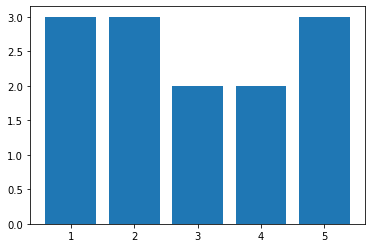

In [49]:
plt.bar(list(hist.keys()), list(hist.values())) #hist의 key 값과 values 값으로 만든 bar 그래픽 데이터

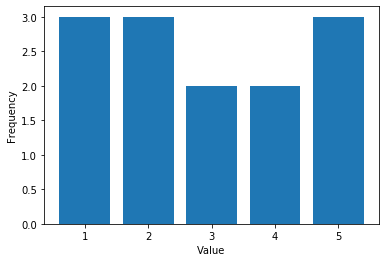

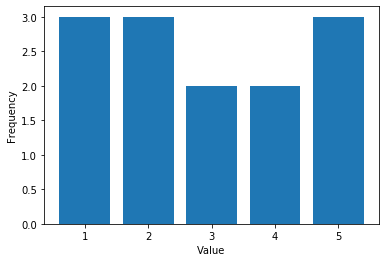

In [54]:
#x축과 y축 값을 확인하기 위해 따로 지정해준다
plt.bar(list(hist.keys()), list(hist.values()))
plt.xlabel("Value") #x축을 벨류로 이름 붙이고
plt.ylabel("Frequency") #y축을 프리퀀시로 이름 붙인다
plt.show() #화면여 보여달라는 명령어
plt.close() #그림을 더이상 수정하지 않는 경우 끝내겠다는 의미

#x축과 y축에 이름이 생겼습니당

plt.bar(list(hist.keys()), list(hist.values()))
plt.xlabel("Value") #x축을 벨류로 이름 붙이고
plt.ylabel("Frequency") #y축을 프리퀀시로 이름 붙인다
plt.show() #화면여 보여달라는 명령어
plt.close() #그림을 더이상 수정하지 않는 경우 끝내겠다는 의미

#두번 적으면 두개 나옴.
#show와 close를 실행하지 않으면 그래프가 겹쳐져서 출력된다.

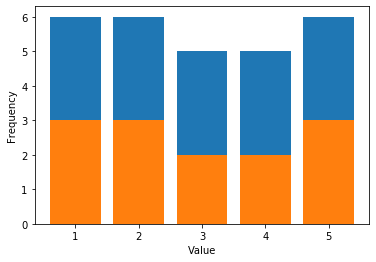

In [56]:
plt.bar(list(hist.keys()),[x + 3 for x in list(hist.values())]) #값이 겹쳐지는걸 확인하기 위해 파란색 그래프를 3씩 키워보면 보임
plt.xlabel("Value") #x축을 벨류로 이름 붙이고
plt.ylabel("Frequency") #y축을 프리퀀시로 이름 붙인다
#plt.show() #화면여 보여달라는 명령어
#plt.close() #그림을 더이상 수정하지 않는 경우 끝내겠다는 의미

plt.bar(list(hist.keys()), list(hist.values()))
plt.xlabel("Value") #x축을 벨류로 이름 붙이고
plt.ylabel("Frequency") #y축을 프리퀀시로 이름 붙인다
plt.show() #화면여 보여달라는 명령어
plt.close() #그림을 더이상 수정하지 않는 경우 끝내겠다는 의미

(array([3., 0., 3., 0., 0., 2., 0., 2., 0., 3.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

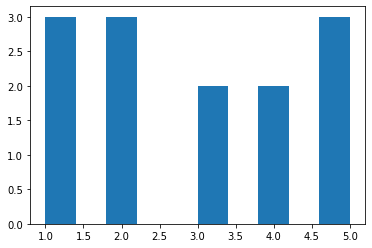

In [58]:
plt.hist(values) #plt만 적어도 알아서 히스토그램을 그려준다.
#위치는 기본적으로 10개로 쪼개기 때문에 비어있는 부분이 있을 수 있다.

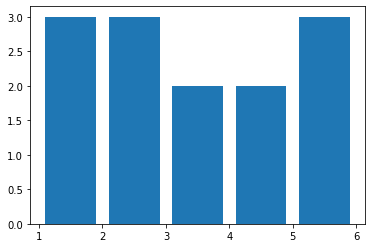

In [63]:
plt.hist(values, bins = range(1,7), rwidth = 0.8) # rwidth는 막대바의 폭
#데이터가 표시되는 범위를 1에서부터 7미만까지로 잡아주면 x축의 데이터가 1~6까지로 표시되어 깔끔하게 나온다.
plt.show()
plt.close()

In [64]:
list(range(1,7))

[1, 2, 3, 4, 5, 6]

In [70]:
import pandas as pd
preg = pd.read_csv("./2002FemPreg.tsv", sep = '\t')
live = preg[preg.outcome == 1 ] #생존해서 태어난 아이의 데이터 == 1

In [71]:
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


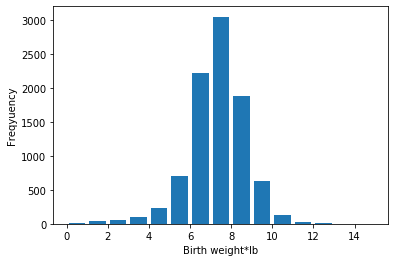

In [76]:
#칼럼 하나를 조회하는 방법 live["birthwgt_lb"]
#버스웨이트_lb -> 태어났을 때의 무게
#데이터프레임에서 칼럼을 조회하여 히스토그램 그리기
plt.hist(live["birthwgt_lb"], #얼만큼 잘게 쪼갤지 bin값에 대입하여 지정 (파운드 단위로 쪼개는 경우)
        bins = range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max() + 1)), 
#최소값의 인티저 값부터 최대값에서 +1 한만큼의 인티저 값 까지(range) 한 개 단위로 증가시켜 주도록 지정
         #즉, range는 하나씩 증가하는 값을 리턴해서 bins에 넣어준다.
        rwidth = 0.8)

plt.xlabel("Birth weight*lb")
plt.ylabel("Freqyuency")
plt.show()
plt.close()
#깔끔하게 나옵니다

In [78]:
# 임신시 임산부 나이의 분포를 보고싶다면?
live["agepreg"]
#카운트를 하려면 내림으로 변경해주어야 한다.

0        33.16
1        39.25
2        14.33
3        17.83
4        18.33
5        27.00
6        28.83
7        30.16
8        28.08
9        32.33
10       25.75
11       23.00
12       24.58
15       28.33
16       30.33
17       18.91
19       27.91
20       30.58
21       18.91
23       22.25
24       25.75
25       29.41
26       32.66
27       18.83
28       20.83
29       21.66
31       33.08
32       26.25
33       27.91
34       37.25
         ...  
13548    23.91
13551    25.25
13552    26.25
13553    27.25
13554    28.91
13555    17.16
13556    21.16
13557    26.33
13559    23.58
13560    26.91
13561    28.16
13562    18.25
13563    21.08
13564    23.33
13565    20.25
13566    32.66
13569    18.00
13570    24.41
13571    27.83
13572    33.16
13573    22.25
13574    24.41
13576    31.66
13578    24.00
13579    25.91
13581    30.66
13584    26.91
13588    17.91
13591    21.58
13592    21.58
Name: agepreg, Length: 9148, dtype: float64

In [80]:
np.floor(live["agepreg"]) #실수였던 값을 내림하여 반환해준다.

0        33.0
1        39.0
2        14.0
3        17.0
4        18.0
5        27.0
6        28.0
7        30.0
8        28.0
9        32.0
10       25.0
11       23.0
12       24.0
15       28.0
16       30.0
17       18.0
19       27.0
20       30.0
21       18.0
23       22.0
24       25.0
25       29.0
26       32.0
27       18.0
28       20.0
29       21.0
31       33.0
32       26.0
33       27.0
34       37.0
         ... 
13548    23.0
13551    25.0
13552    26.0
13553    27.0
13554    28.0
13555    17.0
13556    21.0
13557    26.0
13559    23.0
13560    26.0
13561    28.0
13562    18.0
13563    21.0
13564    23.0
13565    20.0
13566    32.0
13569    18.0
13570    24.0
13571    27.0
13572    33.0
13573    22.0
13574    24.0
13576    31.0
13578    24.0
13579    25.0
13581    30.0
13584    26.0
13588    17.0
13591    21.0
13592    21.0
Name: agepreg, Length: 9148, dtype: float64

In [83]:
hist = {key : val for key, val in enumerate(np.bincount(np.floor(live["agepreg"]) ))if val !=0}

<BarContainer object of 35 artists>

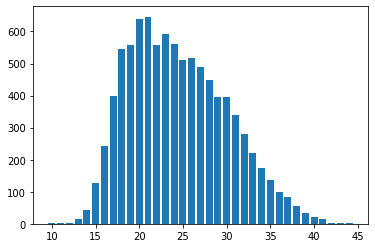

In [88]:
plt.bar(hist.keys(), hist.values()) #이럴거면 plt 쓰는 의미가 없다..!!

(array([  22.,  598., 1840., 1988., 1759., 1412.,  942.,  430.,  137.,
          20.]),
 array([10.83 , 14.155, 17.48 , 20.805, 24.13 , 27.455, 30.78 , 34.105,
        37.43 , 40.755, 44.08 ]),
 <a list of 10 Patch objects>)

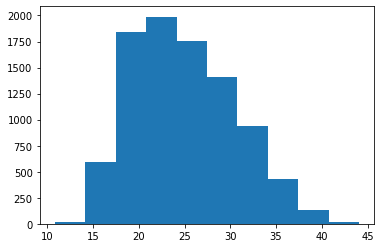

In [89]:
plt.hist(live["agepreg"]) #이렇게 사용하면 됨~ plt라이브러리의 hist를 사용하여 데이터프레임의 칼럼을 지정하면 자동으로 그려줌

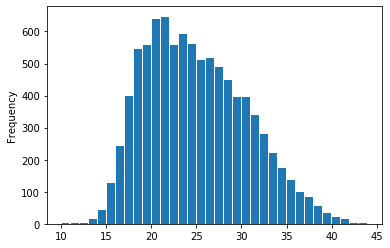

In [94]:
live["agepreg"].plot.hist(rwidth=0.8, 
                                bins = range(int(live["agepreg"].min()), int(live["agepreg"].max()+1)))
#hist안에 인자를 넣어 그래프를 설정할 수 있다. 너비, 나타낼 범위 bins 등

<BarContainer object of 35 artists>

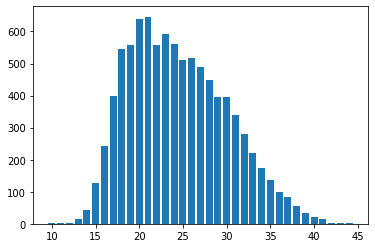

In [95]:
plt.bar(hist.keys(), hist.values())
#위와 동일하게 출력된다.

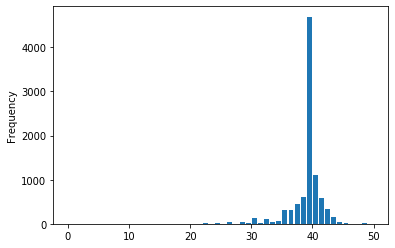

In [96]:
#임신기간 으로 칼럼을 바꾸어 똑같이 실행

live["prglngth"].plot.hist(rwidth=0.8, 
                                bins = range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))

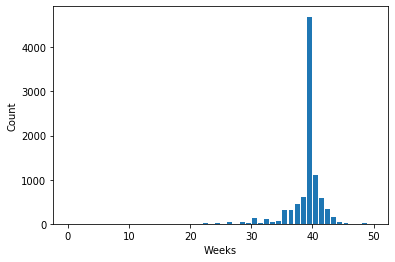

In [97]:
#해당 그래프에 plt를 통해 파라미터를 넣어줄 수 있다
live["prglngth"].plot.hist(rwidth=0.8, 
                                bins = range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))

plt.xlabel("Weeks")
plt.ylabel("Count")
plt.show()
plt.close()

In [98]:
# 주피터랩에서 셀(칸)을 넘어가는 코드에서는 close를 해주지 않아도 겹치지 않는다!

In [100]:
live.groupby("prglngth").count()["caseid"].sort_index()[0:10]
# prglngth로 그룹하여 묶은다음에 caseid를 카운트해서 값이 몇 개 들어가있는지 셈(40주에 몇개.. 30주에 몇개의 데이터가 들어가있는지)
#인덱스 순으로 정렬하여 0부터 9까지 보여줌

#0주에 1명 4주에 1명 .. 등 데이터가 정리되어 인덱스 순서대로 나온다.
#0주 4주 등은 오류로 볼 수 있다..

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: caseid, dtype: int64

In [102]:
live.groupby("prglngth").count()["caseid"].sort_index(ascending=False)[0:10] 
#ascending : 올림차순, false로 만들면 반대가 되어 내림차순이 된다.

prglngth
50       2
48       7
47       1
46       1
45      10
44      46
43     148
42     328
41     587
40    1116
Name: caseid, dtype: int64

In [142]:
firsts = live[live["birthord"]==1] #첫번째로 출산한 아이의 값
others = live[live["birthord"]>1] #첫번째가 아닌 순서로 출산한 아이의 값
#태어난 순서를 사용해서 데이터를 가져올 것이므로 여기선 birthord 칼럼을 사용

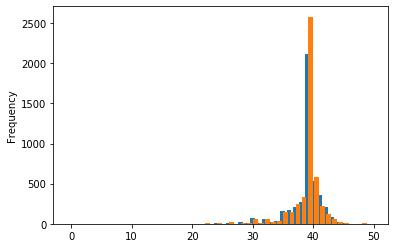

In [112]:
firsts["prglngth"].plot.hist(rwidth=0.8, align="left",
                                bins = range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))

others["prglngth"].plot.hist(rwidth=0.8, align="mid",
                                bins = range(int(live["prglngth"].min()), int(live["prglngth"].max()+1)))
#첫째아이의 임신기간과 첫번째가 아닌 아이의 임신기간을 두개의 그래프로 만들어서 비교가능
#align을 통해 그래프가 그려질 위치를 조정할 수 있다.

In [114]:
len(firsts)

4413

In [115]:
len(others)

4735

In [116]:
#두 데이터의 절대값이 다르다.

In [119]:
mean = firsts["prglngth"].mean() #first의 평균을 구하려면 .mean()을 사용하면 된다.
mean

38.60095173351461

In [121]:
median = firsts["prglngth"].median() #중간값 구하기
median

#정형분포라서 mean과 median 값이 비슷한다.

39.0

In [122]:
var = firsts["prglngth"].var() #분산 구하기
var

7.794713509229059

In [123]:
std = firsts["prglngth"].std() #표준편차 구하기
std

2.7919014146686947

In [124]:
#표준편차와 분산은 서로 루트관계이다.
var ** 0.5, std
# var에 루트(제곱근)을 벗기는 **0.5(0.5승)를 연산해주면 std의 값과 동일하게 나온다.

(2.7919014146686947, 2.7919014146686947)

In [125]:
var, std **2 
#마찬가지로 std값에 제곱근(2승)을 씌워주면  var와 데이터가 동일하게 나온다

(7.794713509229059, 7.794713509229059)

In [126]:
#구해놓은 값의 평균값을 가지고 비교하면, others가 근소한 차이로 느리다는 것을 알 수 있다.
firsts["prglngth"].mean() - others["prglngth"].mean()

0.07803726677754952

In [130]:
# cohen effect size
#두개의 평균의 차이를 합동표준편차로 나누어 줌
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean() #두 그룹의 평균값의 뺄셈, 즉 차이를 diff에 담는다
    var1 = group1.var() #첫번째 그룹의 표준편차
    var2 = group2.var() #두번째 그룹의 표준편차
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / (pooled_var ** 0.5)
    return d

CohenEffectSize의 식은 아래와 같다.

$s = \frac{n_1 \times \sigma^2_{x_1} + n_2 \times \sigma^2_{x_2}}{n_1 + n_2}$ (pool_var)

$d = \frac{<x_1> - <x_2>}{s}$
(두 x의 평균의 차이를 s로 나누어서 d를 구한다)

In [131]:
CohenEffectSize(firsts["prglngth"], others["prglngth"])
#합동표준편차를 사용하여 두 그룹의 평균값의 차이를 구할 수 있는데,
#통계적으로 큰 차이가 없음을 알 수 있다.

0.028879044654449883

In [132]:
#최빈값 구하기
firsts["prglngth"].mode()

#제일 많이 확인되는 값은 39주이다.

0    39
dtype: int64

In [137]:
firsts.prglngth.value_counts()[firsts["prglngth"].mode()]
#39가 총 2114개로 가장 많은 최빈값인 것을 알 수 있다.

39    2114
Name: prglngth, dtype: int64

In [139]:
plt.rcParams['figure.facecolor'] = 'white' #배경색 설정

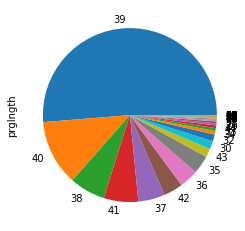

In [140]:
live["prglngth"].value_counts().plot.pie()
#파이차트를 사용하여 데이터 그리기